# Neural Network

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from scipy.optimize import minimize
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
np.set_printoptions(suppress = True)

## Implement a neural network

#### Import data

In [29]:
data = loadmat('data/ex4data1.mat')

X = np.c_[np.ones(data['X'].shape[0]), data['X']]
y = data['y']

m = X.shape[0] # Number of training examples
n = X.shape[1] # Number of features including the bias unit

print(m, n)

5000 401


#### Visualize data

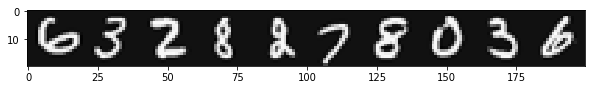

In [30]:
sample = np.random.randint(0, X.shape[0] + 1, 10)
plot = X[sample, 1:].reshape(-1, 20).T
img = plt.imshow(plot, cmap = cm.Greys_r)

#### Import pre-trained weights

In [31]:
weights = loadmat('data/ex4weights.mat')

Theta1, Theta2 = weights['Theta1'], weights['Theta2']

print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


#### Feedforward propagation

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sig_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [40]:
def randInitWeights(L_in, L_out):
    eps = 0.12
    return 2 * eps * np.random.random_sample((L_out, L_in + 1)) - eps

In [34]:
def costFunc(params, input_layer_size, hidden_layer_size, num_labels, X, y, myLambda):
    theta1 = params[0:( hidden_layer_size * (input_layer_size + 1) )].reshape( hidden_layer_size, (input_layer_size + 1) )
    theta2 = params[( hidden_layer_size * (input_layer_size + 1) ):].reshape( num_labels, (hidden_layer_size + 1) )
    
    m = X.shape[0]
    a1 = X
    
    z2 = theta1.dot(a1.T)
    a2 = np.r_[np.ones((1, z2.shape[1])), sigmoid(z2)]
    
    z3 = theta2.dot(a2)
    a3 = sigmoid(z3)
    
    Y = pd.get_dummies(y.ravel()).as_matrix()
    
    J = (-1/m) * np.trace( np.log(a3).dot( Y ) + np.log( 1 - a3 ).dot( ( 1 - Y ) ) ) + \
            ( myLambda/(2*m) ) * ( np.trace( (theta1[:,1:]).T.dot(theta1[:,1:]) ) + np.trace( (theta2[:,1:]).T.dot(theta2[:,1:]) ) )
    
    # Backpropagation
    
    delta3 = a3.T - Y 
    delta2 = theta2[:, 1:].T.dot(delta3.T) * sig_gradient(z2) 

    D1 = delta2.dot(a1) 
    D2 = delta3.T.dot(a2.T)

    theta1_reg = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_reg = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
    theta1_grad = D1/m + (theta1_reg * myLambda)/m 
    theta2_grad= D2/m + (theta2_reg * myLambda)/m
    
    grad = np.r_[theta1_grad.ravel(), theta2_grad.ravel()]
    
    return (J, grad)

#### Unregularized cost

In [35]:
params = np.r_[Theta1.ravel(), Theta2.ravel()]
u_cost = costFunc(params, Theta1.shape[1] - 1, Theta1.shape[0], Theta2.shape[0], X, y, 0)
print(u_cost[0])

0.28762916516131887


#### Regularized cost

In [36]:
r_cost = costFunc(params, Theta1.shape[1] - 1, Theta1.shape[0], Theta2.shape[0], X, y, 1)
print(r_cost[0])

0.3837698590909236


## Backpropagation

In [37]:
sig_gradient(np.array(([0, -10, 100], [0, 10, 100])))

array([[0.25     , 0.0000454, 0.       ],
       [0.25     , 0.0000454, 0.       ]])

In [41]:
print (randInitWeights(2,3))

[[-0.02200357 -0.04653905 -0.10362706]
 [-0.07160138  0.01622979  0.08353079]
 [-0.09829504 -0.01353803 -0.11995028]]


In [42]:
def compute_numerical_gradient(theta, lmda):
    eps = 10**(-4)
    numgrad = np.zeros(theta.size)
    perturb = np.zeros(theta.size)
    
    for i in range (0, theta.size):
        perturb[i] = eps
        J_plus = nn_cost_function(theta + perturb, Theta1.shape[1]-1, Theta1.shape[0], Theta2.shape[0], X, y, lmda)[0]
        J_minus = nn_cost_function(theta - perturb, Theta1.shape[1]-1, Theta1.shape[0], Theta2.shape[0], X, y, lmda)[0]
        numgrad[i] = ( J_plus - J_minus )/(2*eps)
        perturb[i] = 0
        
    return numgrad

In [43]:
def gradCheck(params, lmda):
    
    numgrad = compute_numerical_gradient(nn_params, lmda)
    cost, grad = costFunc(params, Theta1.shape[1]-1, Theta1.shape[0], Theta2.shape[0], X, y, 0)
    
    return np.linalg.norm( numgrad - grad )/np.linalg.norm( numgrad + grad )

In [46]:
theta1_0 = randInitWeights(400, 25)
theta2_0 = randInitWeights(25, 10)
theta_0 = np.r_[theta1_0.ravel(), theta2_0.ravel()]

In [48]:
lmda = 1
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
nn = minimize( fun = costFunc, x0 = theta_0, 
              args = (input_layer_size, hidden_layer_size, num_labels, X, y, lmda), 
              method = 'CG', jac = True, options = {'maxiter' : 400} )

In [49]:
nn

     fun: 0.3309071535497492
     jac: array([ 0.00021758, -0.00000097,  0.00000085, ...,  0.00002362,
        0.00000709,  0.00000815])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 623
     nit: 226
    njev: 611
  status: 2
 success: False
       x: array([-1.62233152, -0.00484192,  0.00422574, ...,  2.60147137,
       -1.48272288,  2.38857853])

In [50]:
res_layer1 = nn.x[0:( hidden_layer_size * (input_layer_size + 1) )].reshape( hidden_layer_size, (input_layer_size + 1) )
res_layer2 = nn.x[( hidden_layer_size * (input_layer_size + 1) ):].reshape( num_labels, (hidden_layer_size + 1) )

print(res_layer1.shape)

(25, 401)


In [51]:
def predict_one_vs_all( Thetas, X ):
    
    probability = sigmoid( X.dot(Thetas.T) )
    
    return ( np.argmax( probability, axis = 1 ) + 1 )

In [52]:
def predict( theta1, theta2, X ):
    z2 = theta1.dot( X.T )
    a2 = np.r_[ np.ones( (1, z2.shape[1]) ), sigmoid(z2) ].T
    a3 = predict_one_vs_all( theta2, a2 )
    return a3

In [53]:
tr_acc = np.mean( ( y.ravel() == predict( res_layer1, res_layer2, X ))*100 )
print(tr_acc)

99.42


## Visualize the hidden layer

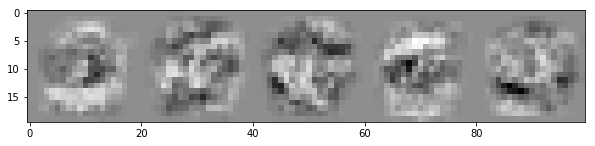

In [54]:
def viz_hidden_layer(layer1):
    layer = Theta1[5:10,1:]
    hl = layer.reshape(-1, 20).T
    img = plt.imshow(hl, cmap = cm.Greys_r)
    
viz_hidden_layer(res_layer1)